Naïve Bayes classifier for the dataset

Import Statements

In [87]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB, ComplementNB
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


importing the dataset

In [88]:
df = pd.read_csv("./CleanedData.csv", index_col=0)
columns = df.columns
print(df.head())

   GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0      337.0        118.0                  4  4.5   4.5  9.65         1   
1      324.0        107.0                  4  4.0   4.5  8.87         1   
2      316.0        104.0                  3  3.0   3.5  8.00         1   
3      322.0        110.0                  3  3.5   2.5  8.67         1   
4      314.0        103.0                  2  2.0   3.0  8.21         0   

   SES Percentage  Asian  african american  latinx  white  Chance of Admit  
0              12      1                 0       0      0             0.92  
1              11      0                 0       1      0             0.76  
2              78      0                 0       1      0             0.72  
3              77      0                 0       0      1             0.80  
4               1      0                 1       0      0             0.65  


define x

It is important to note that, because the Naïve Bayes formula assumes all the features are independent, there is no need
for feature scaling.

In [89]:
x = df[columns[0:-1]]

Again, like Decision tree, I have to binarize the y column. To do so, i must find the threshold, which for now will be
the median value

In [90]:
median_value = df["Chance of Admit"].median()
print(median_value)

0.73


0.73 is the median, and thus will use as the threshold for binarization.

In [91]:
for i in range(len(df["Chance of Admit"])):
    if df.loc[i, "Chance of Admit"] >= 0.73:
        df.loc[i, "Chance of Admit"] = 1
    else:
        df.loc[i, "Chance of Admit"] = 0
print(df["Chance of Admit"])

0      1.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
351    1.0
352    1.0
353    1.0
354    0.0
355    1.0
Name: Chance of Admit, Length: 356, dtype: float64


Defining y


In [92]:
y = df["Chance of Admit"]

splitting x and y into training and testing data

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True, random_state=1)
print(x_train.head())
print()
print(y_train.head())

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
23       300.0         97.0                  2  3.0   3.0  8.10         1   
320      338.0        115.0                  5  4.5   5.0  9.23         1   
213      328.0        110.0                  4  4.0   2.5  9.02         1   
51       307.0        101.0                  3  4.0   3.0  8.20         0   
92       301.0        107.0                  3  3.5   3.5  8.34         1   

     SES Percentage  Asian  african american  latinx  white  
23               93      0                 0       1      0  
320              19      0                 0       0      1  
213              15      0                 0       0      1  
51               94      0                 0       0      1  
92               52      0                 0       1      0  

23     0.0
320    1.0
213    1.0
51     0.0
92     0.0
Name: Chance of Admit, dtype: float64


Creating Gaussian, Bernoulli, Multinominal, and Complement Naïve Bayes learners.

In [94]:
gaussian_model = GaussianNB()
bernoulli_model = BernoulliNB()
multinominal_model = MultinomialNB()
complement_model = ComplementNB()


Fitting each model with the training data

In [95]:
gaussian_model.fit(x_train, y_train)
bernoulli_model.fit(x_train, y_train)
multinominal_model.fit(x_train, y_train)
complement_model.fit(x_train, y_train)


ComplementNB()

Obtaining y_pred from each model


In [96]:
y_pred_g = gaussian_model.predict(x_test)
y_pred_b = bernoulli_model.predict(x_test)
y_pred_m = multinominal_model.predict(x_test)
y_pred_c = complement_model.predict(x_test)

creating lists of the scores and precisions to use for graphing

In [97]:
accuracies = [accuracy_score(y_test, y_pred_g),
              accuracy_score(y_test, y_pred_b),
              accuracy_score(y_test, y_pred_m),
              accuracy_score(y_test, y_pred_c)]

precisions = [precision_score(y_test, y_pred_g),
              precision_score(y_test, y_pred_b),
              precision_score(y_test, y_pred_m),
              precision_score(y_test, y_pred_c)]

models = ["Gaussian",
          "Bernoulli",
          "Multinominal",
          "Complement"]

Print accuracy and precision scores

In [98]:
print("Gaussian Model accuracy: " + str(accuracy_score(y_test, y_pred_g)))
print("Gaussian Model precision: " + str(precision_score(y_test, y_pred_g)))
print("Bernoulli Model accuracy: " + str(accuracy_score(y_test, y_pred_b)))
print("Bernoulli Model precision: " + str(precision_score(y_test, y_pred_b)))
print("Multinominal Model accuracy: " + str(accuracy_score(y_test, y_pred_m)))
print("Multinominal Model precision: " + str(precision_score(y_test, y_pred_m)))
print("Complement Model accuracy: " + str(accuracy_score(y_test, y_pred_c)))
print("Complement Model precision: " + str(precision_score(y_test, y_pred_c)))

Gaussian Model accuracy: 0.8426966292134831
Gaussian Model precision: 0.8627450980392157
Bernoulli Model accuracy: 0.7752808988764045
Bernoulli Model precision: 0.803921568627451
Multinominal Model accuracy: 0.5617977528089888
Multinominal Model precision: 0.62
Complement Model accuracy: 0.5842696629213483
Complement Model precision: 0.6346153846153846


It appears the Gaussian Naïve Bayes is the best predictor of the Bayes classifiers, with an accuracy of 84.27% and a
precision of 86.27%

Naïve Bayes is a relatively simple learner. I was surpised at the classification accuracy it was able to achieve. However,
I feel slightly powerless because there are not many hyperparameters to alter, except for only the types of NB classifiers.

Below is a graph of the accuracies and precisions gotten from the classifier.

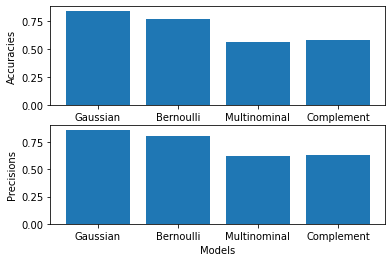

In [99]:
fig, axs = plt.subplots(ncols=1, nrows=2)
axs[0].bar(models, accuracies)

axs[0].set_ylabel("Accuracies")
axs[1].bar(models, precisions)
axs[1].set_ylabel("Precisions")
axs[1].set_xlabel("Models")
plt.show()


These results make sense for most of the features. We would assume that there would be a relatively gaussian distribution
of these features. This can be seen clearly in the EDA. It would be interesting, however, to strictly choose the features
that are normally distrbuted according to the scatter plot matrix. These features are:
GRE Score
TOEFL Score
University Rating
SOP
LOR
CGPA

In [100]:
x = df[["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR ", "CGPA"]]

print(x.head())
print(y.head())

   GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA
0      337.0        118.0                  4  4.5   4.5  9.65
1      324.0        107.0                  4  4.0   4.5  8.87
2      316.0        104.0                  3  3.0   3.5  8.00
3      322.0        110.0                  3  3.5   2.5  8.67
4      314.0        103.0                  2  2.0   3.0  8.21
0    1.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: Chance of Admit, dtype: float64


Splitting the data

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

Creating the model and fitting the data

In [102]:
model = GaussianNB()

model.fit(x_train, y_train)

GaussianNB()

Obtaining prediction and printing accuracy and precision score

In [103]:
y_pred = model.predict(x_test)

In [105]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

Accuracy: 0.8539325842696629
Precision: 0.8918918918918919


As we can see, the accuracy here is very similar to the one gotten from using all features, which further proves the
point that the Gaussian NB classifier is the best of the NB classifiers for this dataset. It is important to note, too,
that using a feature of race in a classifier is dangerous because of the possibility of the classifier becoming racially
biased. By eliminating these features, we are looking at the score. I hypothesize that, because we are not looking at
race, we are actually not understanding the human element of the admissions decisions in this day and age, which is the
possibility that race does not play a negative role but rather a positive one. By not including race as a feature, it is
possible that we actually did not account for minority races being positively weighted. Which is a long way of saying
that, it is possible that, by not looking at race, we might have racially biased our model. Ironic. It could also be
explained by the fact that we are simply using fewer features.
